# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li> 
<li><a href="#cleaning">3. Data Cleaning</a></li>
<li><a href="#eda">4. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
For my second project of the Data Analyst Nanodegree course by Udacity I had to analyze a dataset. The dataset I analyzed collected information from 100k medical appointments in Brazil and is focused on the question of whether or not patients showed up for their appointments. This dataset was downloaded from Kaggle and is called ["No-show appointments dataset"](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1534875600228000).

#### Data Dictionary
- PatinetId (this tells us the patient ID).
- AppointmentID (this tells us the appointment ID).
- Gender (this tells us the gender of the patient).
- ScheduledDay (this tells us on what day the patient had set up their appointment).
- AppointmentDay (this tells us the day of the actual appointment, when they have to visit the doctor).
- Age (this shows the age of the patients).
- Neighborhood (this tells us the location of the hospital).
- Scholarship (which indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família).
- Hipertension (this tells us if the appointment involves a patient who suffers from hypertension or not).
- Diabetes (this tells us if the appointment involves a patient who suffers from diabetes or not).
- Alcoholism (this tells us if the appointment involves a patient who suffers from alcoholism or not).
- Handcap (this tells us if the appointment involves a patient who has a handicap or not).
- SMS_received (this shows us if the patient received an SMS or not).
- No-show (this tells us if the patient showed up or not).

#### Questions
With this information I can start thinking of questions I want and can answer using this dataset. I came up with the following questions:
- QUESTION 1: "Is the No-show percentage lower for people who received an SMS?"
- QUESTION 2: "Is the No-show percantege higher is some neigbourhoods than others?"
- QUESTION 3: "Does the age influence if a patient will show up or not?"

#### Loading libraries and data
To start exploring the data I first need to load the python libraries I need. After I loaded the data I can start cleaning the data where needed and start investigating the dataset in order to answer the questions I came up with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## 2. Data Wrangling
In this section of the report, I will load in the data, check for cleanliness, and trim and clean the dataset for analysis using the same steps as learned in "Lesson 3: The data analysis proces".

### General Properties

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This shows us what kind of data we are working with and how the columns are called. We can see that 'PatientId' and 'AppointmentID' have some inconsistent spelling. We can also see that 'Hipertension' is misspelled and should be 'Hypertension'. The same counts for 'Handcap'. This should be 'Handicap'. I will change this in the Data Cleaning section.

In [3]:
df.shape

(110527, 14)

This shows us the amount of rows and columns in the dataset.

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

This shows us the datatypes of the various columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All of the columns have 110527 non-null values. The number of rows is also 110527. This means that there aren't any nulls in the dataset. Another thing I noticed is that the 'No-show' column is a string. In order to work with this column I need to change the string to a integer. I will do this during the Data Cleaning process.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This shows us some interesting summary statistics. However the 'No-show' data doesn't show up. This is because the 'No-show' data is a string and not a integer. It also shows that the minimum age is -1 and the maximum age is 115. This needs a more specific look.

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This shows us the number of unique values in each column. 'AppointmentID' has 110527 unique values which is the same as the number of rows. This means that there aren't any duplicate appointment ID's. We can see that 'Gender' has two unique values ('F' and 'M'). 'Age' has 104 unique values which seems like a lot to me. I will need to take a closer look to see if nothing weird is going on there. The same counts for 'Neighbourhood'. 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism' and 'SMS_received' all have 2 unique values (0 or 1) which seems about right. 'No-show' also has 2 unique values ('Yes' and 'No') which also seems about right. The 'Handcap' column had 5 unique values (0, 1, 2, 3, 4).

In [8]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

All the ages look pretty possible except for 115 and -1. 115 can be possible but highly unlikely so I will remove that value in the Data Cleaning section. -1 is not possible so I think that is a mistake. I will also remove that value in the Data Cleaning section.

In [9]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

This shows us that there are indeed 81 different neighbourhoods. They look all very legit so I won't need to clean this data further.

####  Conclusion:
The data was pretty clean on itself and I won't have to do a lot of Data Cleaning before I can start working with this dataset. 
- I need to change the 'PatientId' column to 'PatientID' so the title matches with the 'AppointmentID' column.
- I need to change the spelling errors in the 'Hipertension' and 'Handcap' column.
- I need to change the 'No-show' column to a integer.
- I need to remove 115 and -1 from the 'Age' column.

<a id='cleaning'></a>
## 3. Data Cleaning
In this section of the report, I will clean the data using the same steps as learned in "Lesson 3: The data analysis proces".

In [10]:
df.rename(columns = {'PatientId' : 'PatientID'}, inplace = True)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In this piece of code I changed the 'PatientId' column to 'PatientID' to make the spelling more consistent. I also took a look at the head to make sure the change came through correctly.

In [11]:
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'}, inplace = True)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In this piece of code I changed the 'Hipertension' and 'Handcap' column to 'Hypertension' and 'Handicap' to get rid of the spelling mistakes. I also took a look at the head to make sure the changes came through correctly.

In [12]:
df['No-show'] = df['No-show'].replace(('Yes', 'No'), (1, 0))
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


First I had to chang the 'No-show' column from a string to an integer. I did that by changing 'Yes' and 'No' to 1 and 0 and checked the head to make sure the changes went through. I also checked the info once again to see if 'No-show' was an integer.

In [14]:
df = df.drop(df[df['Age'] == -1].index)
df = df.drop(df[df['Age'] == 115].index)
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99])

Since the 115 and -1 age seems highly unlikely and not possible, I decided to drop these values. After that, I checked all the ages again to see if the changes went through correctly.

In [15]:
df.drop('Scholarship', axis=1, inplace=True)
df.drop('Hypertension', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)
df.drop('Alcoholism', axis=1, inplace=True)
df.drop('Handicap', axis=1, inplace=True)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0


I decided to drop these columns since I won't be working with those. It makes it easier for me to read the dataset when I'm analyzing the dataset.

<a id='eda'></a>
## 4. Exploratory Data Analysis
After trimming and cleaning the data, I'm ready to answer the questions I came up with. I came up with the following questions:
- QUESTION 1: "Is the No-show percentage lower for people who received an SMS?"
- QUESTION 2: "Is the No-show percantege higher is some neigbourhoods than others?"
- QUESTION 3: "Does the age influence if a patient will show up or not?"

### Research Question 1 - "Is the No-show percentage lower for people who received an SMS?"

In [16]:
df.rename(columns = {'No-show' : 'No_show'}, inplace = True)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0


I had to change the title of the 'No-show' column to 'No_show' in order to apply Multiple Criteria Filtering so I could answer this question. The - sign in the 'No-show' column was giving me an error. After I changed it I checked the head to make sure the change came through correct.

In [17]:
SMS_received_showed_up = df[(df.SMS_received == 1) & (df.No_show == 0)].count().No_show
SMS_received_showed_up

25697

This piece of code gives me the number of people who received an SMS and showed up to their appointment.

In [18]:
SMS_received_no_show = df[(df.SMS_received == 1) & (df.No_show == 1)].count().No_show
SMS_received_no_show

9784

This piece of code gave me the number of people who received an SMS and didn't show up to their appointment.

In [19]:
no_SMS_no_show = df[(df.SMS_received == 0) & (df.No_show == 1)].count().No_show 
no_SMS_no_show

12532

This piece of code gave me the number of people who didn't receive an SMS and didn't show up tot their appointment.

In [20]:
no_SMS_showed_up = df[(df.SMS_received == 0) & (df.No_show == 0)].count().No_show
no_SMS_showed_up

62508

This piece of code gave me the number of people who didn't receive an SMS and showed up to their appointment.

In [21]:
df.No_show.count()

110521

This piece of code shows me how many people were in this dataset. After finding out this infomation I could make a pie chart to clearly visualize which situation is the most common situation. The visualisation can be seen down below.

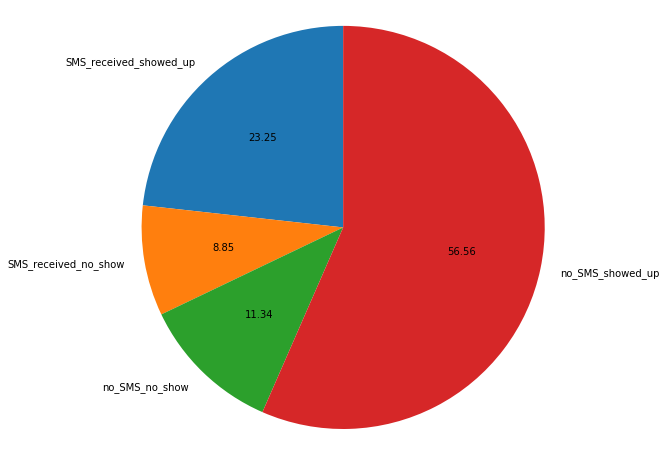

In [22]:
PieLabels = 'SMS_received_showed_up', 'SMS_received_no_show', 'no_SMS_no_show', 'no_SMS_showed_up'
PopulationShare = [25697, 9784, 12532, 62508]
figureObject, axesObject = plt.subplots(figsize = (8, 8))

axesObject.pie(PopulationShare, labels = PieLabels, autopct ='%1.2f', startangle = 90)
axesObject.axis('equal')

plt.show()

This figure shows us that 56.6% of the patients show up without receiving an SMS. It also shows that sending an SMS helps the patients remember to show up on their appointment. 23.3% of the people got an SMS and showed up on their appointment whereas 8.9% of the patients received an SMS and failed to show up.

### Research Question 2 - "Is the No-show percantege higher is some neigbourhoods than others?"

In [23]:
df_neighbourhood = df[['No_show', 'Neighbourhood']].groupby('Neighbourhood').count()
df_neighbourhood.head()

,No_show
Neighbourhood,
AEROPORTO,8
ANDORINHAS,2258
ANTÔNIO HONÓRIO,271
ARIOVALDO FAVALESSA,282
BARRO VERMELHO,423


I used the following code to see how many No-shows every neighbourhood had. This wasn't clear so I decided to sort the number of No-shows to make it more readable. 

In [24]:
df_neighbourhood_sorted_most = df_neighbourhood.sort_values('No_show', ascending = False)
df_neighbourhood_sorted_most.head()

,No_show
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514


Here you can see the top 5 neigbourhoods with the most No-shows. JARDIM CAMBURI has the most No-shows out of all the neighbourhoods mentioned in this dataset. In order to make it more readable I designed the visual down below.

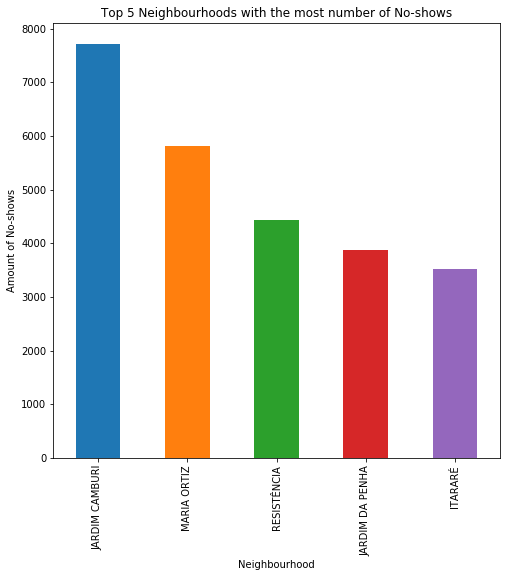

In [25]:
df_neighbourhood_sorted_most.head()['No_show'].plot(kind = 'bar', figsize = (8, 8)) 
plt.title ('Top 5 Neighbourhoods with the most number of No-shows')
plt.xlabel ('Neighbourhood')
plt.ylabel ('Amount of No-shows');

In [26]:
df_neighbourhood_sorted_least = df_neighbourhood.sort_values('No_show', ascending = True)
df_neighbourhood_sorted_least.head()

,No_show
Neighbourhood,
PARQUE INDUSTRIAL,1
ILHAS OCEÂNICAS DE TRINDADE,2
AEROPORTO,8
ILHA DO FRADE,10
ILHA DO BOI,35


Here you can see the top 5 neigbourhoods with the least No-shows. PARQUE INDUSTRIAL has the least No-shows out of all the neighbourhoods mentioned in this dataset. In order to make it more readable I designed the visual down below.

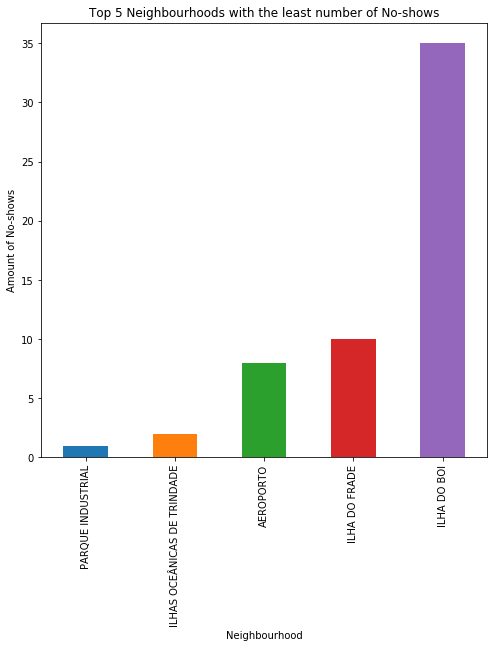

In [27]:
df_neighbourhood_sorted_least.head()['No_show'].plot(kind = 'bar', figsize = (8, 8)) 
plt.title ('Top 5 Neighbourhoods with the least number of No-shows')
plt.xlabel ('Neighbourhood')
plt.ylabel ('Amount of No-shows');

### Research Question 3 - "Does the age influence if a patient will show up or not?"

In [28]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
df['Age_bins'] = pd.cut(df['Age'], bins)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No_show,Age_bins
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,"(60, 65]"


In order to look for a pattern in missing an appointment and age I decided to make bins in order to make the visual more clear. I also printed the head to see if my code worked.

In [29]:
df_age = df[['No_show', 'Age_bins']].groupby('Age_bins').count()
df_age

,No_show
Age_bins,
"(0, 5]",8192
"(5, 10]",7018
"(10, 15]",5719
"(15, 20]",7380
"(20, 25]",6751
"(25, 30]",7032
"(30, 35]",7372
"(35, 40]",7680
"(40, 45]",6902


By using this code I could see which age bin has the most amount of No-shows. This looks a bit messy though so I think I can make it more clear by making a visualization and sorting the age bins from most No-shows to least No-shows.

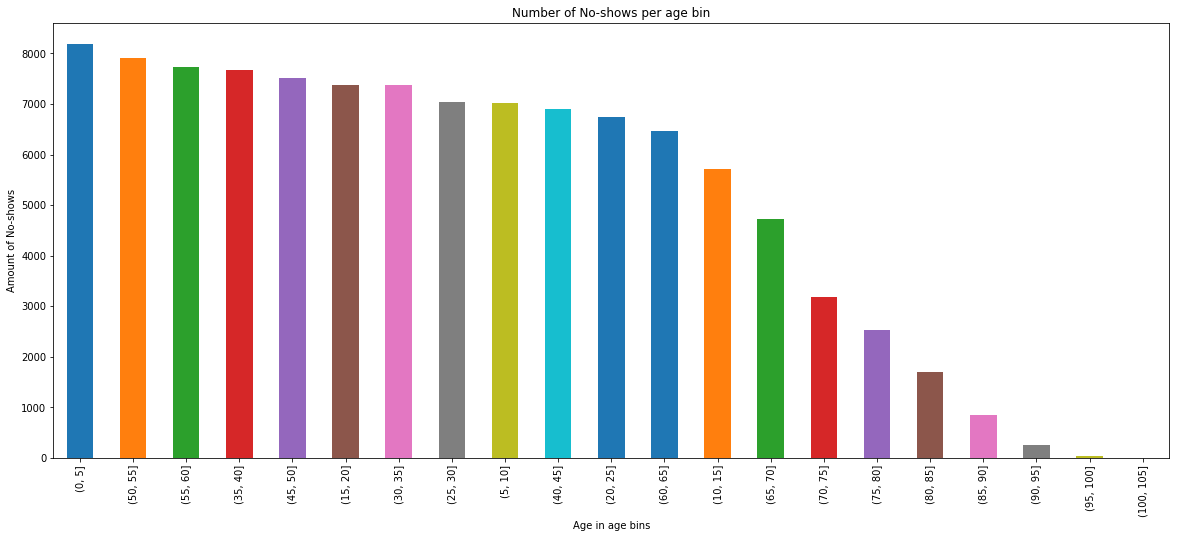

In [30]:
df_age_sorted = df_age.sort_values('No_show', ascending = False)

df_age_sorted ['No_show'].plot(kind = 'bar', figsize = (20, 8)) 
plt.title ('Number of No-shows per age bin')
plt.xlabel ('Age in age bins')
plt.ylabel ('Amount of No-shows');

By making this visualization I could easily see which age bin has the most No-shows. It appears that the age bin 0,5 has the most No-shows. It also looks like that the older the patients are, the more likely they are to show up at their appointment.

<a id='conclusions'></a>
## 5. Conclusions
The questions I wanted to answer were the following:
#### QUESTION 1: "Is the No-show percentage lower for people who received an SMS?"
The data shows that most people show up without having to get an SMS (56,56%). The people that received an SMS and showed up at their appointment take up 23,25%. The people that received an SMS and didn't show up at their appointment take up 8.85%. The people that didn't receive an SMS and didn't show up at their appointment take up 11,34%.

That shows that people don't necessarily need to receive an SMS in order to show up at their appointment although it might help some people. This does not mean it properly reflects all the patients behaviour. This is what the dataset reflected.

#### QUESTION 2: "Is the No-show percantege higher is some neigbourhoods than others?"
There is a corralation between the neighbourhood a patient lives and the likeliness of a patietn showing up. The neighbourhood with the most No-shows is Jardim Camburi with 7717 No-shows. 6.98% of all the No-shows come from this area. The neighbourhood with the least No-shows is Parque Industrial with 1 No-show. 0.00090480542% of all the No-shows come from this area. This does not mean it properly reflects all the patients behaviour in these neighbourhoods. This is what the dataset reflected.

#### QUESTION 3: "Does the age influence if a patient will show up or not?"
There is a corralation between the age of a patient and the likeliness they show up on their appointment. Patients from the age 0-5 are the biggest group of people not showing up. 8192 people from this age group did not show up. 7,41% of all the No-shows are from this age bin. patients from the age 100-105 are the smallest group of not showing up for their appointment. 0.00180961084% of all the No-shows are from this age bin.

It also seems like the older people get, the more likely they are to show up for their appointment. This does not mean it properly reflects all the patients behaviour with certain age. This is what the dataset reflected.

#### Limitations
This study didn't make us of any statistical analysis so therefore it gives correlations and makes no attempt to suggest causality.

It might be interesting for further studies to find out the average travel time for a patient to get to the clinic in each nrighbourhood since neighbourhood has a large influence on the No-show percentage. The availabilty of public transport can also be an factor. This data is unknown though.

Another limitation is that some variables were reprecented as a simple 1 or 0. It could be interesting to see why certain patients received an SMS. Maybe then you could discover that people who had a tendency in not showing up started showing up more frequently after receiving an SMS making it easier to see the effectiveness of the SMS.

#### Links used:

- For sorting data: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
- For replacing 'Yes' and 'No' to 1 and 0: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html
- For Multiple Criteria Filtering: https://www.ritchieng.com/pandas-multi-criteria-filtering/
- For making a Pie chart: https://pythontic.com/visualization/charts/piechart